In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 

In [3]:
# Получить статистику по дням. 
# Просто посчитать число всех событий по дням, число показов, число кликов, число уникальных объявлений и уникальных кампаний.
# Разобраться, почему случился такой скачок 2019-04-05? Каких событий стало больше? У всех объявлений или только у некоторых?

# Найти топ 10 объявлений по CTR за все время. CTR — это отношение всех просмотров объявления к кликам. Например, если у объявления было 100 показов и 2 клика, CTR = 0.02. Различается ли средний и медианный CTR объявлений в наших данных?

# Похоже, в наших логах есть баг, объявления приходят с кликами, но без показов! 
# Сколько таких объявлений, есть ли какие-то закономерности? Эта проблема наблюдается на всех платформах?

# Есть ли различия в CTR у объявлений с видео и без? А чему равняется 95 процентиль CTR по всем объявлениям за 2019-04-04?

# Для финансового отчета нужно рассчитать наш заработок по дням. В какой день мы заработали больше всего? В какой меньше? Мы списываем с клиентов деньги, если произошел клик по CPC объявлению, и мы списываем деньги за каждый показ CPM объявления, если у CPM объявления цена - 200 рублей, то за один показ мы зарабатываем 200 / 1000.
# Какая платформа самая популярная для размещения рекламных объявлений? Сколько процентов показов приходится на каждую из платформ (колонка platform)?

# А есть ли такие объявления, по которым сначала произошел клик, а только потом показ?

In [5]:
ads_data = pd.read_csv('C:/Users/1/JupyterProjects/Karpov_curses_lessons_and_projects/lesson_5_ads_data.csv.zip', compression='zip')

In [6]:
ads_data['full_date'] = pd.to_datetime(ads_data.time, unit='s')

In [7]:
ads_data['date'] = pd.to_datetime(ads_data.date)

In [8]:
ads_data.head()

,ad_id,time,event,date,ad_cost_type,has_video,client_union_id,campaign_union_id,platform,ad_cost,target_audience_count,user_id,full_date
0,23456,1554076848,view,2019-04-01,CPM,0,5681,23456,android,190.0,125560,793,2019-04-01 00:00:48
1,111941,1554135866,view,2019-04-01,CPM,0,111793,111941,ios,215.2,32277,1041,2019-04-01 16:24:26
2,111941,1554135866,view,2019-04-01,CPM,0,111793,111941,ios,215.2,32277,41,2019-04-01 16:24:26
3,42987,1554135866,view,2019-04-01,CPM,0,28541,42985,ios,199.1,80160,898,2019-04-01 16:24:26
4,23456,1554135866,view,2019-04-01,CPM,0,5681,23456,web,190.0,125560,29,2019-04-01 16:24:26


In [9]:
# Получить статистику по дням. 
# Просто посчитать число всех событий по дням, число показов, число кликов, число уникальных объявлений и уникальных кампаний.
# Разобраться, почему случился такой скачок 2019-04-05? Каких событий стало больше? У всех объявлений или только у некоторых?


<AxesSubplot:xlabel='date'>

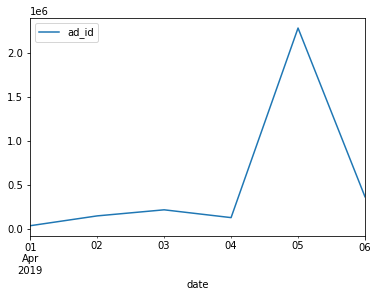

In [10]:
ads_data.groupby('date') \
    .agg({'ad_id': 'count'}).plot()

In [11]:
ads_data.groupby(['date', 'event'], as_index=False) \
    .agg({'ad_id': 'count'}) \
    .pivot(index='date', columns='event', values='ad_id').reset_index()

event,date,click,view
0,2019-04-01,735,34832
1,2019-04-02,1518,145811
2,2019-04-03,1678,214851
3,2019-04-04,1517,126182
4,2019-04-05,501595,1783288
5,2019-04-06,80420,284287


In [12]:
ads_data[ads_data.date == '2019-04-05'] \
    .groupby('ad_id') \
    .agg({'time': 'count'}) \
    .sort_values('time', ascending=False) \
    .head()

,time
ad_id,
112583,2166611
29927,27186
44635,8268
46583,7327
44956,5656


In [13]:
ad_id = 112583

In [14]:
ads_data.query('ad_id == @ad_id').head(1)


,ad_id,time,event,date,ad_cost_type,has_video,client_union_id,campaign_union_id,platform,ad_cost,target_audience_count,user_id,full_date
527124,112583,1554480636,view,2019-04-05,CPM,0,111818,112260,web,199.4,239408,4355,2019-04-05 16:10:36


In [16]:
ads_data.groupby('date', as_index=False)\
        .agg({'ad_id': 'nunique'})

,date,ad_id
0,2019-04-01,49
1,2019-04-02,146
2,2019-04-03,179
3,2019-04-04,150
4,2019-04-05,131
5,2019-04-06,61


In [17]:
ads_data.groupby('date', as_index=False)\
        .agg({'campaign_union_id': 'nunique'})

,date,campaign_union_id
0,2019-04-01,49
1,2019-04-02,146
2,2019-04-03,177
3,2019-04-04,147
4,2019-04-05,130
5,2019-04-06,60


In [18]:
# Найти топ 10 объявлений по CTR за все время. CTR — это отношение всех просмотров объявления к кликам. 
# Например, если у объявления было 100 показов и 2 клика, CTR = 0.02. 
# Различается ли средний и медианный CTR объявлений в наших данных?

In [19]:
ads_data_by_ad = ads_data.groupby(['ad_id', 'event'], as_index=False) \
    .agg({'time': 'count'}) \
    .pivot(index='ad_id', columns='event', values='time').reset_index()

In [20]:
ads_data_by_ad = ads_data_by_ad.assign(ctr = ads_data_by_ad.click / ads_data_by_ad.view, 
                           ctr_per = 100 * ads_data_by_ad.click / ads_data_by_ad.view)

In [21]:
ads_data_by_ad.sort_values('ctr', ascending=False).head(10)

event,ad_id,click,view,ctr,ctr_per
289,112583,580436.0,1934788.0,0.300000,29.999979
324,119450,258.0,1254.0,0.205742,20.574163
125,38575,43.0,257.0,0.167315,16.731518
144,40968,29.0,217.0,0.133641,13.364055
207,45642,42.0,344.0,0.122093,12.209302
283,110924,11.0,95.0,0.115789,11.578947
194,45043,28.0,245.0,0.114286,11.428571
96,35034,112.0,997.0,0.112337,11.233701
5,4585,53.0,476.0,0.111345,11.134454
328,120347,236.0,2168.0,0.108856,10.885609


In [22]:
ads_data_by_ad.ctr.mean()

0.020628096080757954

In [23]:
ads_data_by_ad.ctr.median()

0.010753240746688594

C:\Users\1\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ctr'>

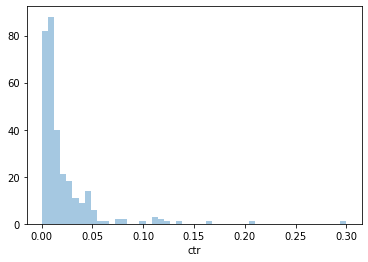

In [24]:
sns.distplot(ads_data_by_ad.ctr, kde=False)

In [86]:
# Похоже, в наших логах есть баг, объявления приходят с кликами, но без показов! 
# Сколько таких объявлений, есть ли какие-то закономерности? Эта проблема наблюдается на всех платформах?

In [25]:
ads_data_by_ad = ads_data_by_ad.fillna(0)

In [26]:
ads_ids_bug = ads_data_by_ad.query('view == 0').ad_id

In [27]:
ads_data[ads_data.ad_id.isin(ads_ids_bug)] \
    .groupby('platform', as_index=False) \
    .agg({'ad_id': 'count'}) \
    .sort_values('ad_id')

,platform,ad_id
2,web,53
1,ios,92
0,android,141


In [28]:
# Какая платформа самая популярная для размещения рекламных объявлений?
ads_data \
    .groupby('platform', as_index=False) \
    .agg({'ad_id': 'count'}) \
    .sort_values('ad_id')

,platform,ad_id
2,web,635425
1,ios,953078
0,android,1588211


In [31]:
# Есть ли различия в CTR у объявлений с видео и без? А чему равняется 95 процентиль CTR по всем объявлениям за 2019-04-04?

In [32]:
df_2019_04_04 =  ads_data[ads_data.date == '2019-04-04'].groupby(['ad_id', 'event'], as_index=False) \
    .agg({'time': 'count'}) \
    .pivot(index='ad_id', columns='event', values='time').reset_index() \
    .fillna(0)

In [33]:
df_2019_04_04['ctr'] = df_2019_04_04.click / df_2019_04_04.view

In [34]:
df_2019_04_04[df_2019_04_04.view > 0].ctr.quantile(q=0.95)

0.06624288425047421

In [49]:
ad_id_without_video = ads_data.query('has_video == 0' ).ad_id

In [50]:
ads_data_by_ad.query('ad_id in @ad_id_without_video').ctr_per.quantile(q=0.95)

5.31807164018314

In [51]:
ads_data_by_ad.query('ad_id not in @ad_id_without_video').ctr_per.quantile(q=0.95)

1.1833340009112439

In [ ]:
# Для финансового отчета нужно рассчитать наш заработок по дням. 
# В какой день мы заработали больше всего? В какой меньше? 
# Мы списываем с клиентов деньги, если произошел клик по CPC объявлению, 
# и мы списываем деньги за каждый показ CPM объявления, если у 
# CPM объявления цена - 200 рублей, то за один показ мы зарабатываем 200 / 1000.
# Какая платформа самая популярная для размещения рекламных объявлений? 
# Сколько процентов показов приходится на каждую из платформ (колонка platform)?


In [146]:
x = pd.Series([1, 2, 3])

In [143]:
import numpy as np

In [64]:
profit_per_day = ads_data[(ads_data.ad_cost_type == 'CPC') &  (ads_data.event == 'click')]\
                .groupby('date', as_index=False).agg({'ad_cost': 'sum'}).rename(columns={'ad_cost': 'profit'})

In [65]:
profit_per_day['profit'] = profit_per_day['profit'] + \
ads_data[(ads_data.ad_cost_type == 'CPM') &  (ads_data.event == 'view')]\
                .groupby('date', as_index=False).agg({'ad_cost': 'sum'}).rename(columns={'ad_cost': 'ad_cost_CPM'})\
                .ad_cost_CPM.apply(lambda x: x / 1000)

In [66]:
profit_per_day

,date,profit
0,2019-04-01,13159.7123
1,2019-04-02,33837.0051
2,2019-04-03,73209.5170
3,2019-04-04,46294.3568
4,2019-04-05,358559.7490
5,2019-04-06,56840.3376


In [70]:
profit_per_day.profit.idxmax()

4

In [71]:
profit_per_day.profit.idxmin()

0

In [86]:
# Сколько процентов показов приходится на каждую из платформ (колонка platform)?
all_views = ads_data.query(' event == "view" ').ad_id.count()
ads_data_views = ads_data.query(' event == "view" ') \
    .groupby('platform', as_index=False) \
    .agg({'ad_id': 'count'}) \
    .sort_values('ad_id')
ads_data_views.ad_id = ads_data_views.ad_id * 100 / all_views

In [87]:
ads_data_views

,platform,ad_id
2,web,20.003777
1,ios,29.974460
0,android,50.021763


In [155]:
# А есть ли такие объявления, по которым сначала произошел клик, а только потом показ?

In [159]:
ads_data.groupby(['ad_id', 'event'], as_index=False) \
    .agg({'time': 'min'}) \
    .pivot(index='ad_id', columns='event', values='time').reset_index() \
    .query('click < view')

event,ad_id,click,view
27,16548,1.554336e+09,1.554336e+09
81,30939,1.554165e+09,1.554173e+09
138,40464,1.554164e+09,1.554164e+09
158,42007,1.554423e+09,1.554423e+09
185,44543,1.554336e+09,1.554337e+09
201,45436,1.554336e+09,1.554336e+09
324,119450,1.554336e+09,1.554336e+09


In [161]:
ads_data[ads_data.ad_id == 16548].sort_values('time')

,ad_id,time,event,date,ad_cost_type,has_video,client_union_id,campaign_union_id,platform,ad_cost,target_audience_count,user_id,full_date
512690,16548,1554336083,click,2019-04-04,CPM,0,722,16523,ios,196.6,53199,4133,2019-04-04 00:01:23
511482,16548,1554336278,view,2019-04-04,CPM,0,722,16523,android,196.6,53199,3736,2019-04-04 00:04:38
511439,16548,1554336352,view,2019-04-04,CPM,0,722,16523,android,196.6,53199,4968,2019-04-04 00:05:52
511438,16548,1554336352,view,2019-04-04,CPM,0,722,16523,ios,196.6,53199,4206,2019-04-04 00:05:52
511437,16548,1554336352,view,2019-04-04,CPM,0,722,16523,web,196.6,53199,3898,2019-04-04 00:05:52
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2056433,16548,1554422265,view,2019-04-05,CPM,0,722,16523,android,196.6,53199,3613,2019-04-04 23:57:45
2056432,16548,1554422265,view,2019-04-05,CPM,0,722,16523,android,196.6,53199,6044,2019-04-04 23:57:45
2056461,16548,1554422308,view,2019-04-05,CPM,0,722,16523,ios,196.6,53199,5831,2019-04-04 23:58:28
2056652,16548,1554422338,view,2019-04-05,CPM,0,722,16523,android,196.6,53199,2837,2019-04-04 23:58:58


Задания из контеста

In [88]:
retail = pd.read_csv('C:/Users/1/JupyterProjects/Karpov_curses_lessons_and_projects/5_data.csv.zip',\
                     compression='zip', encoding='ISO-8859-1')

In [89]:
retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [91]:
retail_columns = retail.columns

In [92]:
retail_columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [93]:
retail.loc[retail.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,12/1/2010 11:49,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,12/9/2011 11:34,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/9/2011 11:34,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,12/9/2011 11:34,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,12/9/2011 11:34,2.10,14446.0,United Kingdom


In [94]:
retail = retail.drop_duplicates()

In [100]:
retail.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
419290,572764,22114,HOT WATER BOTTLE TEA AND SYMPATHY,8,10/26/2011 9:58,4.25,15110.0,United Kingdom
146992,C549041,21039,RED RETROSPOT SHOPPING BAG,-6,4/5/2011 17:22,2.55,17644.0,United Kingdom
357860,568134,23061,VINTAGE EMBOSSED HEART,2,9/23/2011 17:02,2.46,NaN,United Kingdom
97893,544660,21916,SET 12 RETRO WHITE CHALK STICKS,24,2/22/2011 13:47,0.42,15078.0,United Kingdom
168482,551056,22729,ALARM CLOCK BAKELIKE ORANGE,1,4/26/2011 11:51,3.75,16442.0,United Kingdom
160386,550458,35810A,ENAMEL PINK COFFEE CONTAINER,1,4/18/2011 13:13,2.46,NaN,United Kingdom
404542,571679,85099B,JUMBO BAG RED RETROSPOT,2,10/18/2011 13:41,2.08,14159.0,United Kingdom
497118,578347,84569A,PACK 3 IRON ON DOG PATCHES,2,11/24/2011 9:26,2.46,NaN,United Kingdom
122022,546846,22647,CERAMIC LOVE HEART MONEY BANK,2,3/17/2011 12:47,1.45,13533.0,United Kingdom
346204,567183,22465,HANGING METAL STAR LANTERN,6,9/18/2011 15:32,1.65,14769.0,United Kingdom


In [102]:
retail.loc[retail.InvoiceNo.str.startswith('C')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


In [103]:
retail = retail.query('Quantity > 0')

In [104]:
retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [123]:
N = retail.query(' Country == "Germany" ')\
            .groupby('CustomerID', as_index=False)\
            .agg({'InvoiceNo': 'nunique'}).InvoiceNo.quantile(q=0.8)

In [124]:
germany_top = retail.query(' Country == "Germany" ')\
            .groupby('CustomerID', as_index=False)\
            .agg({'InvoiceNo': 'nunique'}).query('InvoiceNo > @N').CustomerID

In [125]:
germany_top

3     12471.0
6     12474.0
8     12476.0
12    12481.0
16    12500.0
26    12524.0
37    12569.0
44    12600.0
51    12619.0
52    12621.0
56    12626.0
64    12647.0
69    12662.0
77    12705.0
78    12708.0
79    12709.0
81    12712.0
83    12720.0
Name: CustomerID, dtype: float64

In [130]:
top_retail_germany = retail.query('CustomerID in @germany_top')

In [135]:
top_retail_germany.groupby('StockCode', as_index=False)\
                .agg({'InvoiceNo': 'count'})\
                .rename(columns={'InvoiceNo': 'count'})\
                .sort_values('count', ascending=False)

,StockCode,count
1157,POST,213
409,22326,52
411,22328,38
453,22423,34
45,20719,30
...,...,...
520,22563,1
524,22569,1
528,22574,1
529,22576,1


In [136]:
retail = retail.assign(Revenue = retail.Quantity * retail.UnitPrice)

In [137]:
retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,16.60


In [148]:
retail.groupby('InvoiceNo', as_index=False)\
            .agg({'Revenue': 'sum'})\
            .rename(columns={'Revenue': 'TotalRevenue'})\
            .sort_values('TotalRevenue', ascending=False).head()

,InvoiceNo,TotalRevenue
20689,581483,168469.60
2202,541431,77183.60
17582,574941,52940.94
18251,576365,50653.91
9034,556444,38970.00
